# **MUSIC RECOMMDATION SYSTEM**

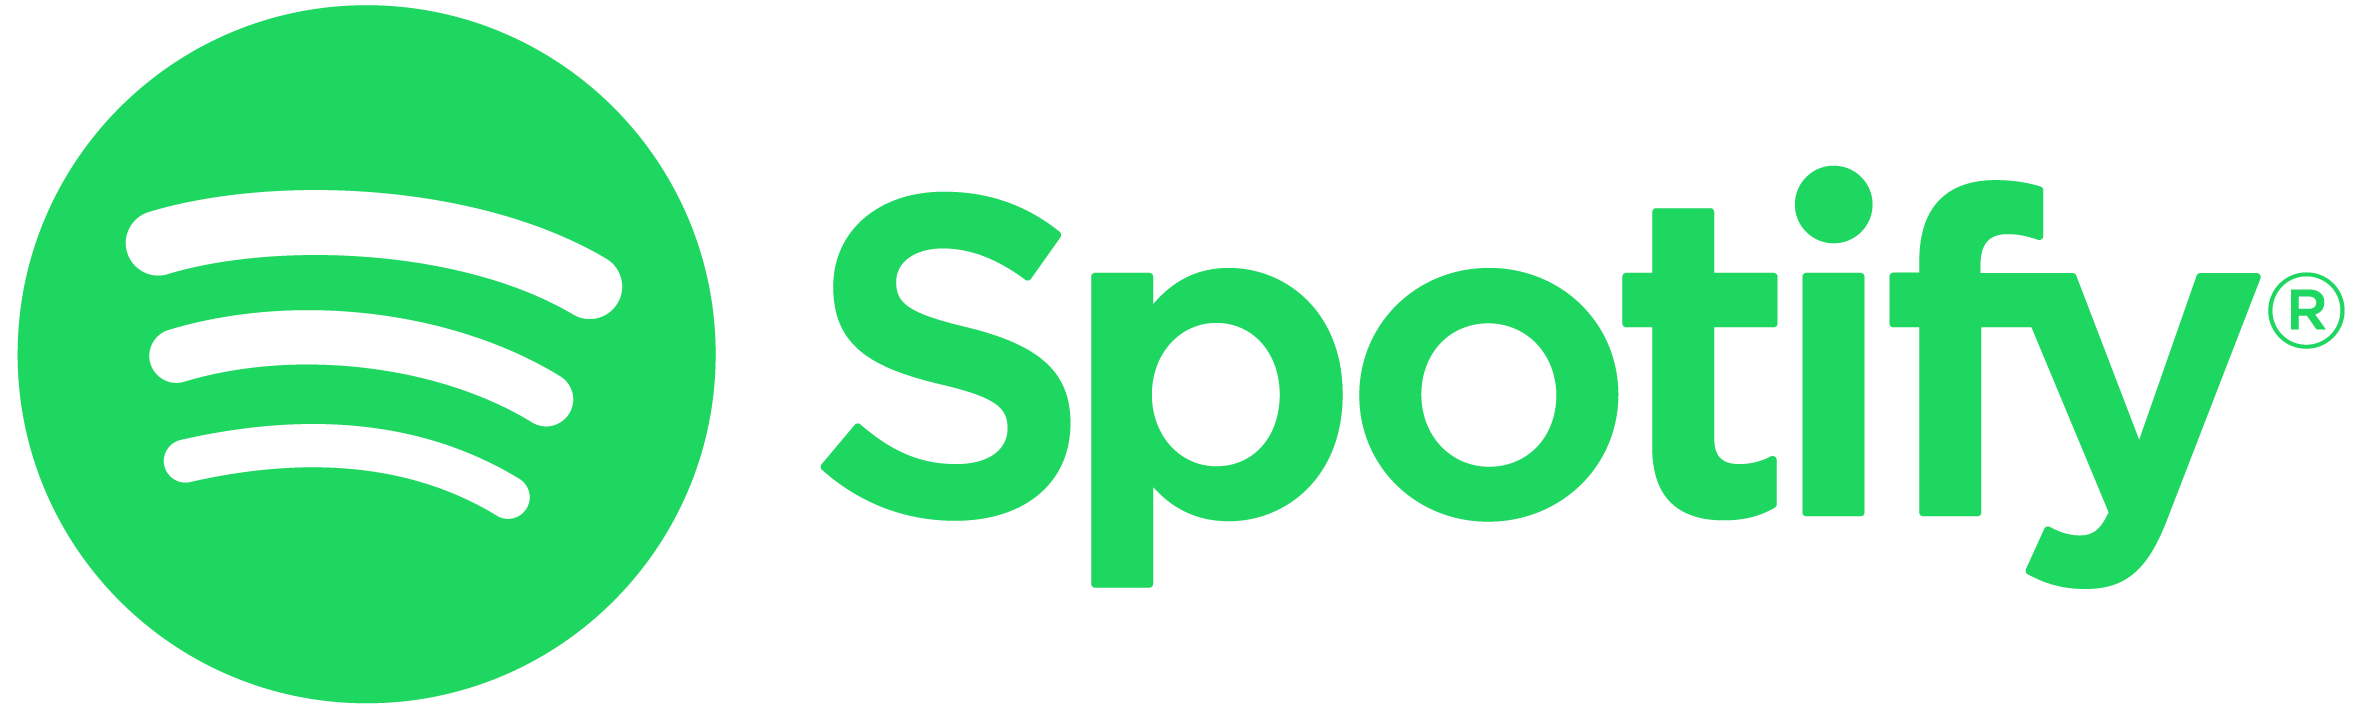

# **Setup Kaggle API**

In [ ]:
!pip install -q kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdullrahmantarek","key":"1527077bdc96d59098fc5b3595283c23"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                                  title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
berkayalan/paris-2024-olympics-medals                                Paris 2024 Olympics Medals                       1KB  2024-08-14 11:02:45           3756         68  1.0              
balajivaraprasad/crimes-against-women-in-india-2001-2021             Crimes Against Women in India (2001-2021)       13KB  2024-08-15 16:47:18           1945         43  1.0              
myrios/cost-of-living-index-by-country-by-number-2024                Cost of Living Index by Country                  3KB  2024-07-19 06:25:42           8069        129  1.0              
lainguyn123/data-science-salary-landscape                   

In [ ]:
!kaggle datasets download -d notshrirang/spotify-million-song-dataset

Dataset URL: https://www.kaggle.com/datasets/notshrirang/spotify-million-song-dataset
License(s): CC0-1.0
 96% 20.0M/20.7M [00:01<00:00, 25.3MB/s]
100% 20.7M/20.7M [00:01<00:00, 14.6MB/s]


In [ ]:
!!unzip spotify-million-song-dataset.zip

['Archive:  spotify-million-song-dataset.zip',
 '  inflating: spotify_millsongdata.csv  ']

# **Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pickle



# **Reading  Data**

**Artist**: The performer of the song.

**Song**: The title of the song.

**Link**: A URL related to the song, often for streaming or additional information.

**Text:** The song lyrics or textual description, used for text analysis.








In [2]:
df=pd.read_csv('spotify_millsongdata.csv')
df


,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...


In [3]:
df.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \r\nYou're e..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \r\nCouldn't s...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \r\nI'm sitting all ...


In [4]:
df.tail(10)

,artist,song,link,text
57640,Zebrahead,The Setup,/z/zebrahead/the+setup_10198494.html,Lie to me \r\nTell me that everything will be...
57641,Ziggy Marley,Freedom Road,/z/ziggy+marley/freedom+road_20531174.html,"That's why I'm marching, yes, I'm marching, \..."
57642,Ziggy Marley,Friend,/z/ziggy+marley/friend_20673508.html,[Chorus] \r\nI wanna thank you for the things...
57643,Ziggy Marley,G7,/z/ziggy+marley/g7_20531173.html,Seven richest countries in the world \r\nThem...
57644,Ziggy Marley,Generation,/z/ziggy+marley/generation_20531171.html,Many generation have passed away \r\nFighting...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...
57649,Zwan,Heartsong,/z/zwan/heartsong_20148991.html,come in \r\nmake yourself at home \r\ni'm a ...


In [5]:
df.shape

(57650, 4)

In [6]:
df.isnull().sum()
#no null values

artist    0
song      0
link      0
text      0
dtype: int64

In [7]:
df.duplicated().sum()
#no dublicated data

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57650 entries, 0 to 57649
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   artist  57650 non-null  object
 1   song    57650 non-null  object
 2   link    57650 non-null  object
 3   text    57650 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [9]:
df.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


# **EDA**



*   Unique Songs and Artists: Understand the diversity and coverage of songs and artists.
* Text Analysis: Extract common themes or words from the lyrics and analyze their distribution.
*Text Length: Determine the typical length of lyrics and its distribution.




In [10]:
# Number of unique songs and artists
print(f"Unique songs: {df['song'].nunique()}")
print(f"Unique artists: {df['artist'].nunique()}")

Unique songs: 44824
Unique artists: 643


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Have Yourself A Merry Little Christmas'),
  Text(1, 0, 'Angel'),
  Text(2, 0, 'Hold On'),
  Text(3, 0, 'Home'),
  Text(4, 0, 'I Believe'),
  Text(5, 0, 'Crazy'),
  Text(6, 0, 'Silent Night'),
  Text(7, 0, 'The Christmas Song'),
  Text(8, 0, 'Forever'),
  Text(9, 0, 'I Love You'),
  Text(10, 0, 'O Holy Night'),
  Text(11, 0, 'Stay'),
  Text(12, 0, 'Beautiful'),
  Text(13, 0, 'Always'),
  Text(14, 0, 'White Christmas'),
  Text(15, 0, 'Amazing Grace'),
  Text(16, 0, 'Alone'),
  Text(17, 0, 'Goodbye'),
  Text(18, 0, 'Smile'),
  Text(19, 0, 'Tonight')])

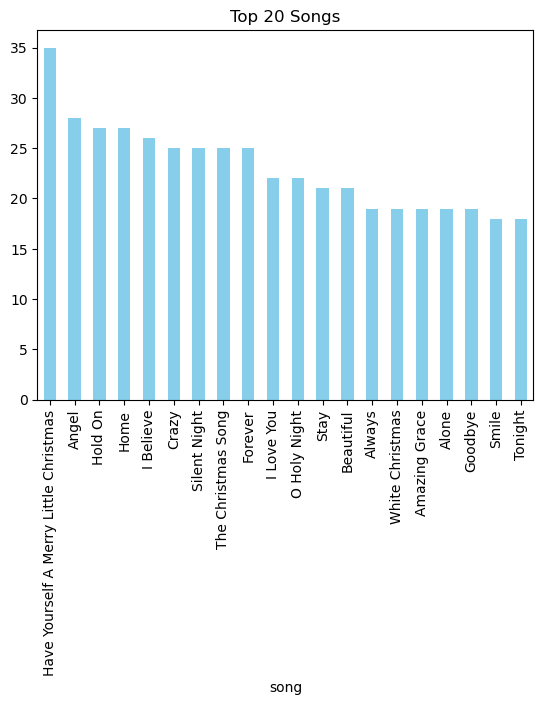

In [11]:
# Distribution of songs and artists

df['song'].value_counts().head(20).plot(kind='bar', color='skyblue')
plt.title('Top 20 Songs')
plt.xticks(rotation=90)

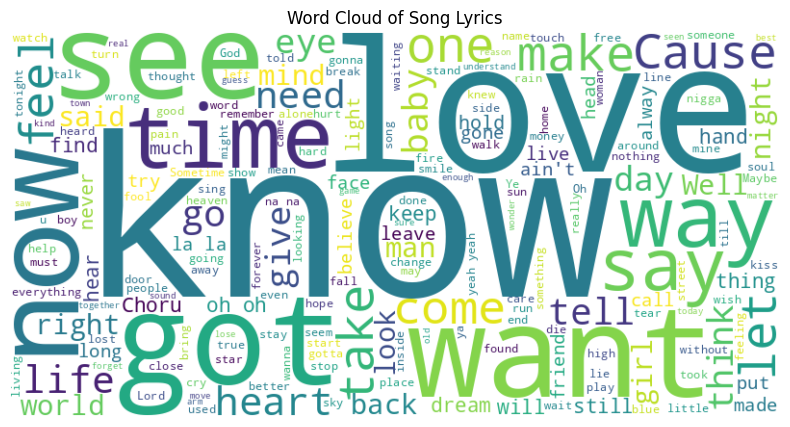

In [ ]:
from wordcloud import WordCloud

# Combine all text data
text_data = ' '.join(df['text'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Song Lyrics')
plt.show()

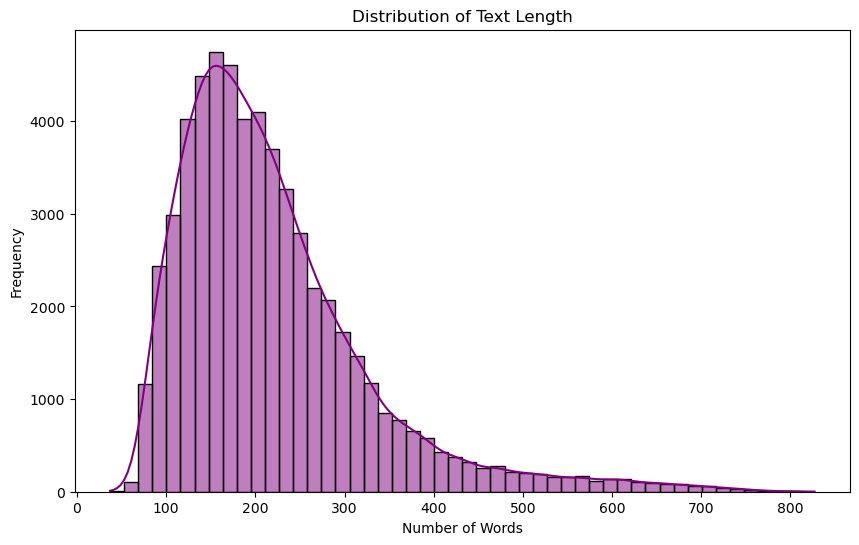

In [12]:
df['text_length'] = df['text'].apply(lambda x: len(str(x).split()))

# Distribution of text length
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Text Length')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

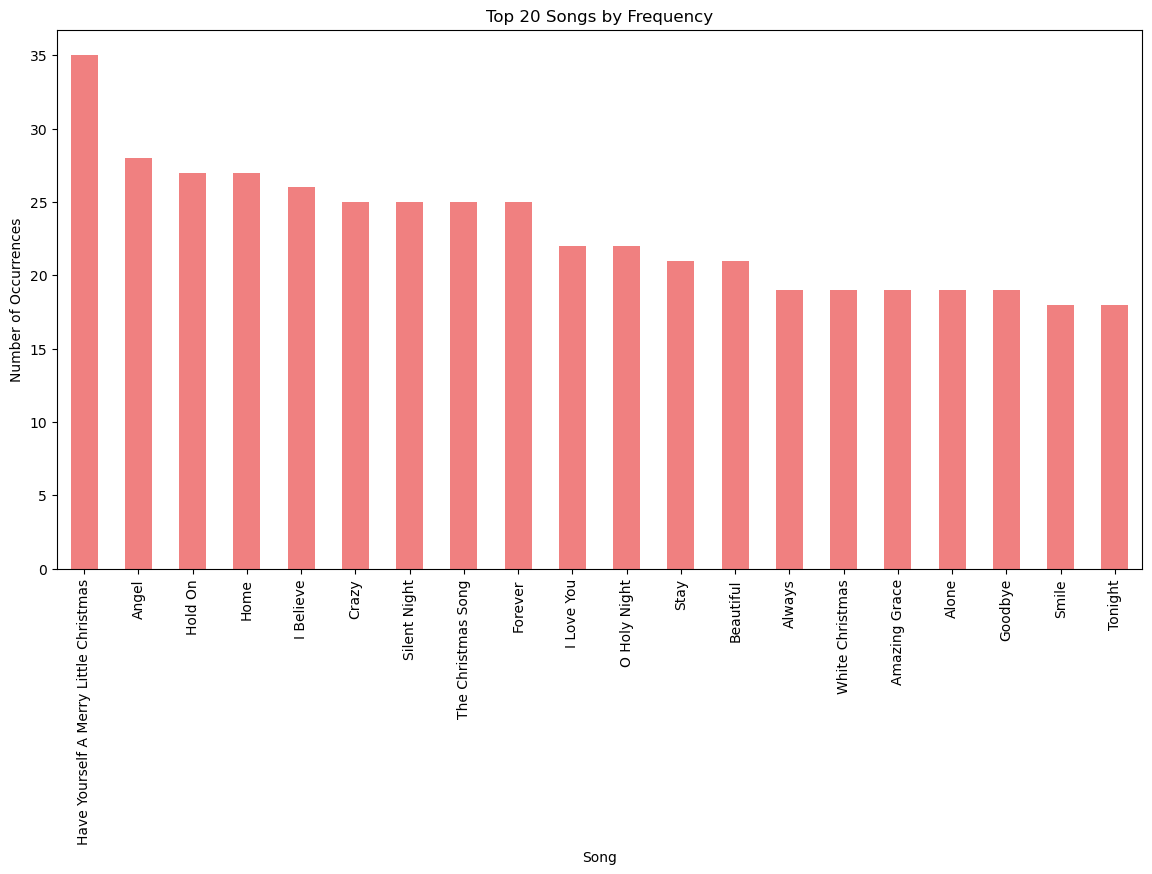

In [13]:
# Count occurrences of each song
song_counts = df['song'].value_counts()
# Plot top songs
plt.figure(figsize=(14, 7))
song_counts.head(20).plot(kind='bar', color='lightcoral')
plt.title('Top 20 Songs by Frequency')
plt.xlabel('Song')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=90)
plt.show()

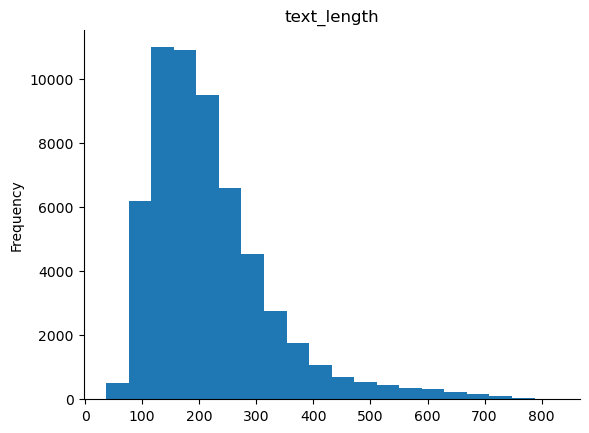

In [14]:
df['text_length'].plot(kind='hist', bins=20, title='text_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

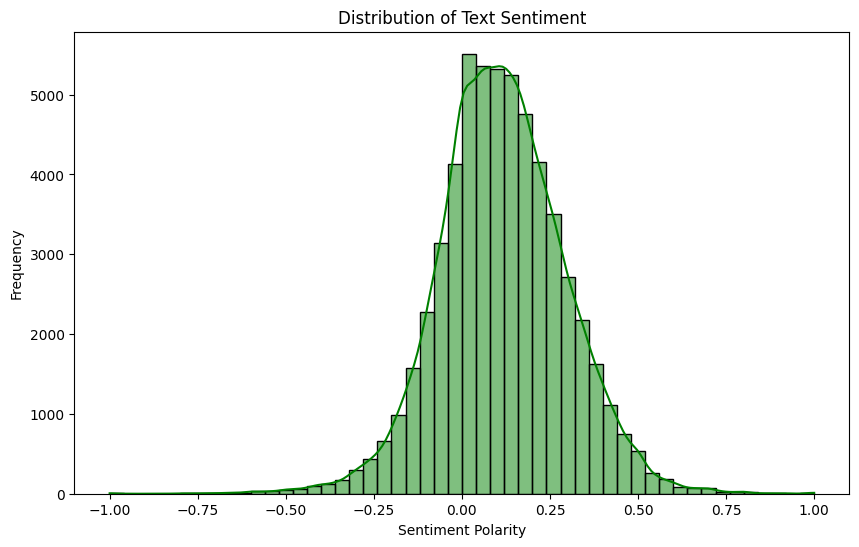

In [ ]:
from textblob import TextBlob

# Apply sentiment analysis
df['text_sentiment'] = df['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['text_sentiment'], bins=50, kde=True, color='green')
plt.title('Distribution of Text Sentiment')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


<ipython-input-21-3ecef6359792>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=words_df.head(20), x='count', y='word', palette='viridis')


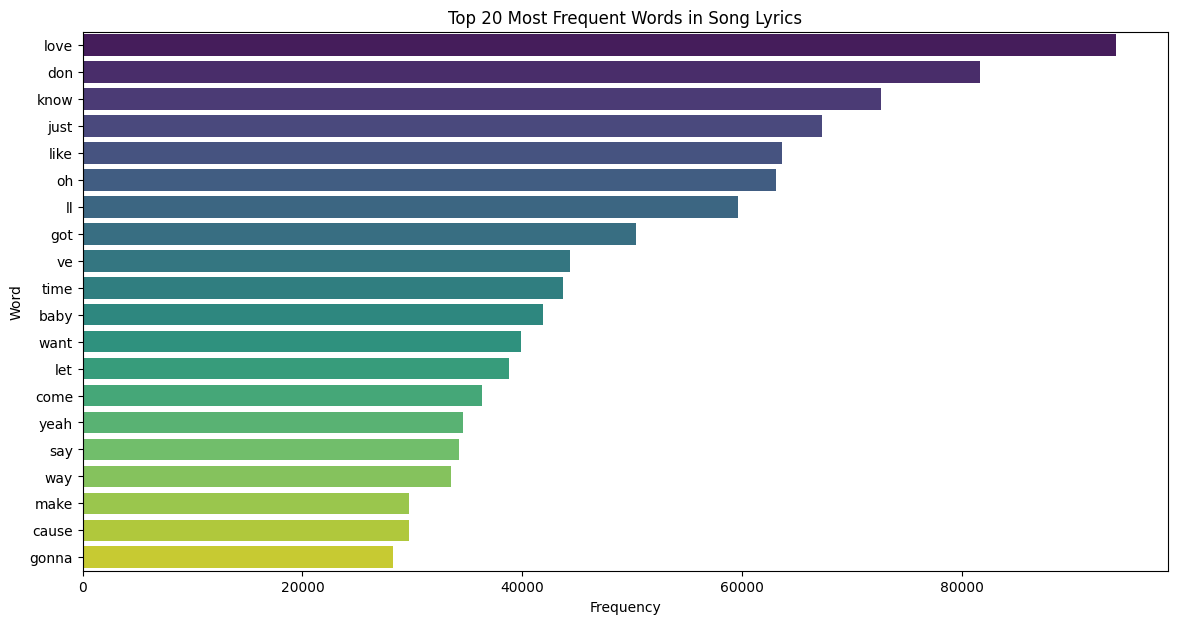

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text'].dropna())

# Sum up the counts of each vocabulary word
sum_words = X.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Convert to DataFrame
words_df = pd.DataFrame(words_freq, columns=['word', 'count'])

# Plot most frequent words
plt.figure(figsize=(14, 7))
sns.barplot(data=words_df.head(20), x='count', y='word', palette='viridis')
plt.title('Top 20 Most Frequent Words in Song Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


#Summary of Insights
**Artist and Song Popularity**:

 Top Song: Have Yourself A Merry Little Christmas is the most frequent song in the dataset, indicating its high popularity.

**Sentiment Analysis**:

The sentiment of the song lyrics is generally neutral to slightly positive, with sentiment scores ranging between 0 to 0.25.

**Temporal Analysis**:

Patterns in song releases or plays over time could provide insights into trends and shifts in music preferences.

**Word Frequency**:

The word "love" is the most frequently occurring word in the song lyrics, suggesting a common theme or emotional tone across the dataset.

**Song Length**:

The majority of songs in the dataset have lengths between 100 and 200 words. This suggests that most songs fall within a certain lyrical density, which could be typical for popular or standard music formats.

In [ ]:
df_sample =df.sample(20000).drop('link', axis=1).reset_index(drop=True)
# creates a new DataFrame that consists of 20,000 randomly selected rows from df, with the 'link' column removed and the index reset.

In [ ]:
df_sample['text'][0]

"VERSE  \r\nChrist is my reward  \r\nAnd all of my devotion  \r\nNow there's nothing in this world  \r\nThat could ever satisfy  \r\n  \r\nPRE-CHORUS  \r\nThrough every trial  \r\nMy soul will sing  \r\nNo turning back  \r\nI've been set free  \r\n  \r\nCHORUS  \r\nChrist is enough for me  \r\nChrist is enough for me  \r\nEverything I need is in You  \r\nEverything I need  \r\n  \r\nVERSE  \r\nChrist my all in all  \r\nThe joy of my salvation  \r\nAnd this hope will never fail  \r\nHeaven is our home  \r\n  \r\nPRE-CHORUS  \r\nThrough every storm  \r\nMy soul will sing  \r\nJesus is here  \r\nTo God be the glory  \r\n  \r\nBRIDGE  \r\nI have decided to follow Jesus  \r\nNo turning back  \r\nNo turning back  \r\n  \r\nThe cross before me  \r\nThe world behind me  \r\nNo turning back  \r\nNo turning back\r\n\r\n"

In [ ]:
df_sample['text'] = df_sample['text'].str.lower().replace(r'^\w\s', ' ').replace(r'\n', ' ', regex = True)
#cleans the text data by converting it to lowercase and replacing newline characters with spaces in the 'text' column.

In [ ]:
df

,artist,song,link,text,text_length,text_sentiment
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA...",153,0.447619
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen...",260,0.202222
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...,312,0.300881
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...,200,0.355000
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...,198,0.355000
...,...,...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \r\nLet the angels fly...,175,0.358824
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \r\nMore power \r\nPowe...,579,-0.131289
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \r\nis something i'll believe \...,272,0.129481
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \r\nam i frightened \r\nwhere ...,137,0.320000


In [ ]:
df_sample

,artist,song,text,text_length,text_sentiment
0,Hillsong,Christ Is Enough,verse \r christ is my reward \r and all of m...,119,0.087500
1,Elvis Presley,Beach Shack,when you're through swimming \r i'll dry your...,171,0.045734
2,Coldplay,Don't Let It Break Your Heart,and if i lost the map \r if i lost it all \r...,125,-0.325000
3,Erasure,Piano Song,never get angry at stupid people \r though i ...,204,-0.043873
4,Josh Groban,I Can't Take My Eyes Off You,and so it is \r just like you said it would b...,218,0.156667
...,...,...,...,...,...
19995,Neil Young,Cortez The Killer,he came dancing across the water \r with his ...,174,0.104063
19996,Fall Out Boy,"Dance, Dance",she says she's no good with words but i'm wors...,281,0.092628
19997,Cher,Dark Lady,"the fortune queen of new orleans, \r was brus...",342,0.162213
19998,Hanson,Silent Night Medley,o holy night the stars are brightly shining \...,243,0.246633


# **Compute TF-IDF and Similarity**

In [ ]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stemmer = PorterStemmer()

def tokenization(txt):
    tokens = nltk.word_tokenize(txt)
    stemming = [stemmer.stem(w) for w in tokens]
    return " ".join(stemming)
    #This function tokenizes a text into words, stems each word to its root form,
    # and then combines the stemmed words back into a single string.
    # This process is useful for text preprocessing in natural language processing tasks.

In [ ]:
df_sample['text'] = df_sample['text'].apply(lambda x: tokenization(x))
#applying tokenization and stemming, and then updates the column with the processed text.

In [ ]:
tfidvector = TfidfVectorizer(analyzer='word',stop_words='english')
matrix = tfidvector.fit_transform(df_sample['text'])
similarity = cosine_similarity(matrix)
#vectorizes the text data using TF-IDF,
#creating a matrix that reflects the importance of words in each document,
#and then calculates the cosine similarity between the documents to measure their textual similarity.

In [ ]:
similarity[0]

array([1.        , 0.00620083, 0.        , ..., 0.03066003, 0.12344963,
       0.01612764])

In [ ]:
def recommendation(song_df):
    idx = df_sample[df_sample['song'] == song_df].index[0]
    distances = sorted(list(enumerate(similarity[idx])), reverse=True, key=lambda x: x[1])

    songs = []
    links = []
    for m_id in distances[1:21]:
        songs.append(df_sample.iloc[m_id[0]].song)
        links.append('https://open.spotify.com/search/'+f'{df_sample.iloc[m_id[0]].song}')

    return pd.DataFrame({'Recommended Song': songs, 'Link': links})
#takes a song title as input, finds similar songs based on lyrics using cosine similarity, and returns a DataFrame with the top 20 recommended songs and their Spotify search links.

In [ ]:
recommendation('Girls')

,Recommended Song,Link
0,Girl Like You,https://open.spotify.com/search/Girl Like You
1,My Lonely Girl,https://open.spotify.com/search/My Lonely Girl
2,I Really Like You,https://open.spotify.com/search/I Really Like You
3,Lookin' For That Girl,https://open.spotify.com/search/Lookin' For Th...
4,My Girl,https://open.spotify.com/search/My Girl
5,Girl,https://open.spotify.com/search/Girl
6,Never Knew Lonely,https://open.spotify.com/search/Never Knew Lonely
7,Young Girl's Heart,https://open.spotify.com/search/Young Girl's H...
8,My Girl,https://open.spotify.com/search/My Girl
9,The Girls,https://open.spotify.com/search/The Girls


In [ ]:
import pickle
pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(df,open('df.pkl','wb'))
#save the similarity matrix and the df DataFrame to disk as binary files using pickle. This allows you to load these objects later without needing to recompute or reload them from scratch.